In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Restaurant Status Analysis(Texas vs Ohio)- 2019 vs 2020

In [4]:
## Creating a path to the csv and read it into a Pandas DataFrame
precovid_ohio = "precovid_ohio2019.csv"
precovid_ohio_df = pd.read_csv(precovid_ohio)
precovid_ohio_df

# reduce the dataframe to columns that are required
reduced_preohio =precovid_ohio_df[["business_id", "name", "state_", "city", "is_open", "categories"]]
reduced_preohio

# Drop the rows that do not contain business ID
red_preohio = reduced_preohio[reduced_preohio["business_id"] != "#NAME?"]
red_preohio

# Remove the duplicate business IDs
clean_preohio = red_preohio.drop_duplicates()
clean_preohio

## Creating a path to the csv and read it into a Pandas DataFrame
postcovid_ohio = "postcovid_ohio2020.csv"
postcovid_ohio_df = pd.read_csv(postcovid_ohio)
postcovid_ohio_df

# reduce the dataframe to columns that are required
reduced_postohio =postcovid_ohio_df[["business_id", "name", "state_", "city", "is_open", "categories"]]
reduced_postohio

# Drop the rows that do not contain business ID
red_postohio = reduced_postohio[reduced_postohio["business_id"] != "#NAME?"]
red_postohio

# Remove the duplicate business IDs
clean_postohio = red_postohio.drop_duplicates()
clean_postohio

## Creating a path to the csv and read it into a Pandas DataFrame
precovid_texas = "precovid_texas2019.csv"
precovid_texas_df = pd.read_csv(precovid_texas)
precovid_texas_df

# reduce the dataframe to columns that are required
reduced_pretexas =precovid_texas_df[["business_id", "name", "state_", "city", "is_open", "categories"]]
reduced_pretexas

# Drop the rows that do not contain business ID
red_pretexas = reduced_pretexas[reduced_pretexas["business_id"] != "#NAME?"]
red_pretexas

# Remove the duplicate business IDs
clean_pretexas = red_pretexas.drop_duplicates()
clean_pretexas

## Creating a path to the csv and read it into a Pandas DataFrame
postcovid_texas = "postcovid_texas2020.csv"
postcovid_texas_df = pd.read_csv(postcovid_texas,encoding='latin-1')
postcovid_texas_df

# reduce the dataframe to columns that are required
reduced_posttexas =postcovid_texas_df[["business_id", "name", "state_", "city", "is_open", "categories"]]
reduced_posttexas

# Drop the rows that do not contain business ID
red_posttexas = reduced_posttexas[reduced_posttexas["business_id"] != "#NAME?"]
red_posttexas

# Remove the duplicate business IDs
clean_posttexas = red_posttexas.drop_duplicates()
clean_posttexas

# merge the cleaned pre and post files for Texas and assign 0 value to blank cells.
merged_texas = pd.merge(clean_pretexas, clean_posttexas, how="outer", on="business_id").fillna(0)
merged_texas["is_open_x"] = merged_texas["is_open_x"].astype('int64')
merged_texas["is_open_y"] = merged_texas["is_open_y"].astype('int64')
merged_texas

# Find total open restaurants in Texas in 2019
total_open_pretexas = len(merged_texas[merged_texas["is_open_x"] == 1])

# Filter restaurants in texas that were open pre covid and are open post covid
still_open_texas = merged_texas[(merged_texas["is_open_x"] == 1) & (merged_texas["is_open_y"] == 1)]
still_open_texas_restaurants = len(still_open_texas["business_id"])

# Filter restaurants in texas that were close in 2019 and were open in 2020
close_open_texas = merged_texas[(merged_texas["is_open_x"] == 0) & (merged_texas["is_open_y"] == 1)]
close_open_texas_restaurants = len(close_open_texas["business_id"])

# Filter restaurants in texas that were open in 2019 and were close in 2020
open_close_texas = merged_texas[(merged_texas["is_open_x"] == 1) & (merged_texas["is_open_y"] == 0)]
open_close_texas_restaurants = len(open_close_texas["business_id"])

# merge the cleaned pre and post files for Ohio and assign 0 value to blank cells.
merged_ohio = pd.merge(clean_preohio, clean_postohio, how="outer", on="business_id").fillna(0)
merged_ohio["is_open_x"] = merged_ohio["is_open_x"].astype('int64')
merged_ohio["is_open_y"] = merged_ohio["is_open_y"].astype('int64')
merged_ohio

# Find total open restaurants in Ohio in 2019
total_open_preohio = len(merged_ohio[merged_ohio["is_open_x"] == 1])

#total_open_preohio = len(merged_ohio["is_open_x"] == 1)
merged_ohio[merged_ohio["is_open_x"] == 1]

# Filter restaurants in ohio that were open pre covid and are open post covid
still_open_ohio = merged_ohio[(merged_ohio["is_open_x"] == 1) & (merged_ohio["is_open_y"] == 1)]
still_open_ohio_restaurants = len(still_open_ohio["business_id"])  

# Filter restaurants in texas that were open in 2019 and were close in 2020
open_close_ohio = merged_ohio[(merged_ohio["is_open_x"] == 1) & (merged_ohio["is_open_y"] == 0)]
open_close_ohio_restaurants = len(open_close_ohio["business_id"])   

# Filter restaurants in texas that were close in 2019 and were open in 2020
close_open_ohio = merged_ohio[(merged_ohio["is_open_x"] == 0) & (merged_ohio["is_open_y"] == 1)]
close_open_ohio_restaurants = len(close_open_ohio["business_id"]) 

new_open_ohio_restaurants = len(close_open_ohio["business_id"])
new_open_texas_restaurants = len(close_open_texas["business_id"])

print(f"Total open restaurants for year 2019 in Texas : {total_open_pretexas}")
print(f"Total open restaurants for year 2019 in Ohio : {total_open_preohio}")

print(f"Total restaurants survived during the pandemic in Texas : {still_open_texas_restaurants}")
print(f"Total restaurants survived during the pandemic in Ohio : {still_open_ohio_restaurants}")

print(f"Total restaurants open in 2020 in Ohio : {new_open_ohio_restaurants}")
print(f"Total restaurants open in 2020 in Texas : {new_open_texas_restaurants}")

print(f"Total restaurants closed in 2020 in Ohio : {open_close_ohio_restaurants}")
print(f"Total restaurants closed in 2020 in Texas : {open_close_texas_restaurants}")

Total open restaurants for year 2019 in Texas : 422
Total open restaurants for year 2019 in Ohio : 421
Total restaurants survived during the pandemic in Texas : 383
Total restaurants survived during the pandemic in Ohio : 354
Total restaurants open in 2020 in Ohio : 2015
Total restaurants open in 2020 in Texas : 2297
Total restaurants closed in 2020 in Ohio : 67
Total restaurants closed in 2020 in Texas : 39


In [5]:
# Create a data frame required to plot the graph
graph_texas_df = pd.DataFrame( [
    {"State" : "Texas",
     "Total Open Restaurants in 2019" : total_open_pretexas,
     "Restaurants survived during the pandemic" :still_open_texas_restaurants,
     "Restaurants closed in 2020" : open_close_texas_restaurants,
     "Restaurants Open in 2020" : new_open_texas_restaurants
    },
    {"State" : "Ohio",
     "Total Open Restaurants in 2019" : total_open_preohio,
     "Restaurants survived during the pandemic" :still_open_ohio_restaurants,
     "Restaurants closed in 2020" : open_close_ohio_restaurants,
     "Restaurants Open in 2020" : new_open_ohio_restaurants}
])
graph_texas_df

,State,Total Open Restaurants in 2019,Restaurants survived during the pandemic,Restaurants closed in 2020,Restaurants Open in 2020
0,Texas,422,383,39,2297
1,Ohio,421,354,67,2015


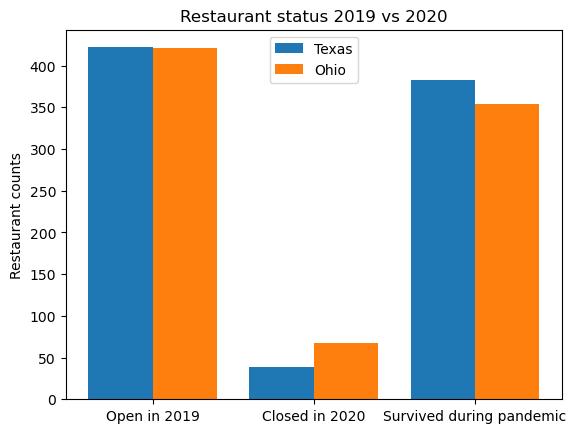

In [58]:
# Plot the graph for restaurant status for 2019 vs 2020 for ohio and texas
X = ["Open in 2019", "Closed in 2020","Survived during pandemic"]
texas_data = [422, 39, 383]
ohio_data = [421, 67, 354]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, texas_data, 0.4, label = 'Texas')
plt.bar(X_axis + 0.2, ohio_data, 0.4, label = 'Ohio')
plt.xticks(X_axis, X)

plt.ylabel("Restaurant counts")
plt.title("Restaurant status 2019 vs 2020")
plt.legend()

plt.savefig("./output/restaurant_status_ohio_vs_texas.png")
plt.show()

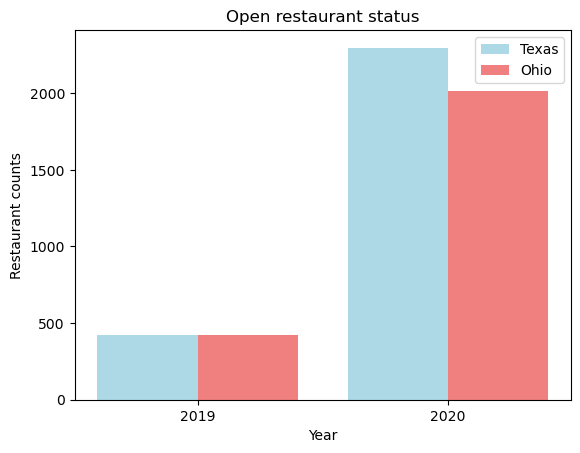

In [59]:
# Plot the graph for open restaurants status for texas and ohio for 2019 and 2020
X = ["2019", "2020"]
texas_data = [422, 2297]
ohio_data = [421, 2015]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, texas_data, 0.4, label = 'Texas',color = "lightblue")
plt.bar(X_axis + 0.2, ohio_data, 0.4, label = 'Ohio', color = "lightcoral")
plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Restaurant counts")
plt.title("Open restaurant status")
plt.legend()
plt.savefig("./output/open_restaurant_status_ohio_vs_texas.png")
plt.show()

# Review Count Analysis(Texas vs Ohio)

In [51]:
# Get the month from the date column of all data frames and store it in a new column 'month' for Ohio and Texas
precovid_ohio_df['month'] = pd.DatetimeIndex(precovid_ohio_df['date_']).month
precovid_ohio_df
postcovid_ohio_df['month'] = pd.DatetimeIndex(postcovid_ohio_df['date_']).month
postcovid_ohio_df
precovid_texas_df['month'] = pd.DatetimeIndex(precovid_texas_df['date_']).month
precovid_texas_df
postcovid_texas_df['month'] = pd.DatetimeIndex(postcovid_texas_df['date_']).month
postcovid_texas_df

# merge data frames of pre and post for Ohio
new_ohio_df = pd.merge(precovid_ohio_df, postcovid_ohio_df, how = "outer", on = "business_id").fillna(0)

new_ohio_df["is_open_x"] = new_ohio_df["is_open_x"].astype('int64')
new_ohio_df["is_open_y"] = new_ohio_df["is_open_y"].astype('int64')
new_ohio_df["month_x"] = new_ohio_df["month_x"].astype('int64')
new_ohio_df["month_y"] = new_ohio_df["month_y"].astype('int64')
new_ohio_df

# reduce the dataframe to columns that are required for Ohio
ohio_data = new_ohio_df[["business_id", "name_x", "state__x", "city_x", "is_open_x", "month_x","name_y", "state__y", "city_y", "is_open_y", "month_y"]]

# Drop the rows that do not contain business ID
ohio_data = ohio_data[ohio_data["business_id"] != "#NAME?"]

# merge data frames of pre and post for Texas
new_texas_df = pd.merge(precovid_texas_df, postcovid_texas_df, how = "outer", on = "business_id").fillna(0)
new_texas_df["is_open_x"] = new_texas_df["is_open_x"].astype('int64')
new_texas_df["is_open_y"] = new_texas_df["is_open_y"].astype('int64')
new_texas_df["month_x"] = new_texas_df["month_x"].astype('int64')
new_texas_df["month_y"] = new_texas_df["month_y"].astype('int64')
new_texas_df

# reduce the dataframe to columns that are required for Texas
texas_data = new_texas_df[["business_id", "name_x", "state__x", "city_x", "is_open_x", "month_x","name_y", "state__y", "city_y", "is_open_y", "month_y"]]

# Drop the rows that do not contain business ID
texas_data = texas_data[texas_data["business_id"] != "#NAME?"]


# Count the total reviews for each month for texas in 2020
texas_post_month = texas_data["month_y"].value_counts()
# Count the total reviews for each month for texas in 2019
texas_pre_month = texas_data["month_x"].value_counts()

# Count the total reviews for each month for ohio in 2020
ohio_post_month = ohio_data["month_y"].value_counts()
# Count the total reviews for each month for ohio in 2019
ohio_pre_month =  ohio_data["month_x"].value_counts()



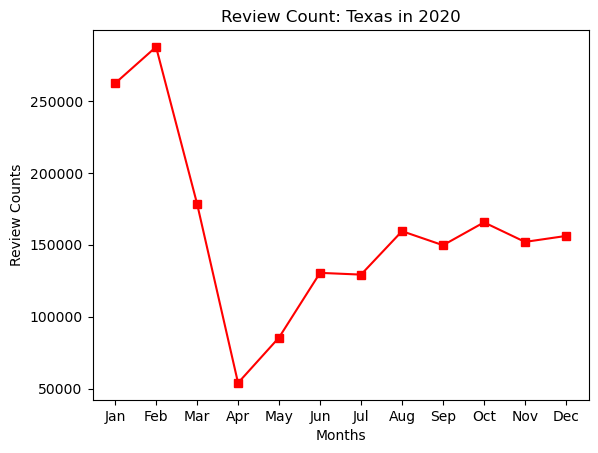

In [66]:
#Plot the line graph for review counts vs month for Texas in 2020
texas_post_df = pd.DataFrame(texas_post_month).sort_index()     # Sort the data month wise
texas_post_df = texas_post_df [texas_post_df["month_y"] != 325]  # drop the value associated with month 0 as there is no month 0. it is due to 0 data for some of the businesses 

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

x_axis = np.arange(1,13,1)
tick_location = [months for months in x_axis]


plt.plot(x_axis,texas_post_df, marker = 's', color = "red" )
plt.xticks(x_axis,months)
plt.xlabel("Months")
plt.ylabel("Review Counts")

plt.title("Review Count: Texas in 2020")

plt.savefig("./output/review_texas_2020.png")
plt.show()

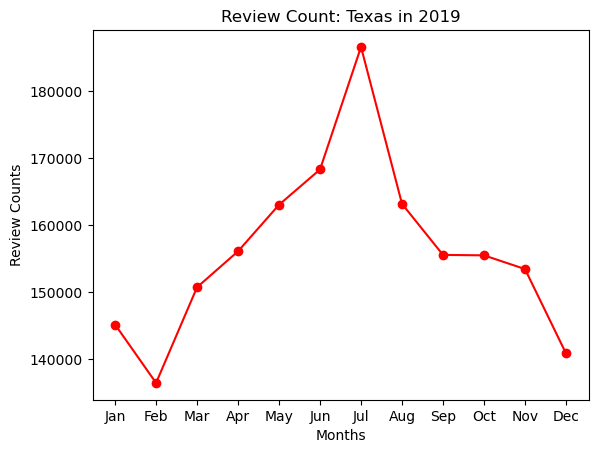

In [67]:
#Plot the line graph for review counts vs month for Texas in 2019
texas_pre_df = pd.DataFrame(texas_pre_month).sort_index()
texas_pre_df = texas_pre_df[texas_pre_df["month_x"] != 36168 ]
texas_pre_df

x_axis = np.arange(1,13,1)
tick_location = [months for months in x_axis]


plt.plot(x_axis,texas_pre_df, marker = "o", color = "red" )
plt.xticks(x_axis,months)
plt.xlabel("Months")
plt.ylabel("Review Counts")

plt.title("Review Count: Texas in 2019")

plt.savefig("./output/review_texas_2019.png")
plt.show()

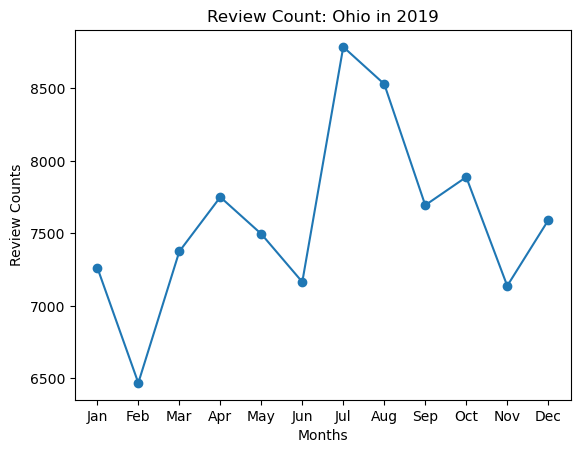

In [68]:
#Plot the line graph for review counts vs month for Ohio in 2019
ohio_pre_df = pd.DataFrame(ohio_pre_month).sort_index()
ohio_pre_df = ohio_pre_df[ohio_pre_df["month_x"] != 16775 ]
ohio_pre_df

tick_location = [months for months in x_axis]

x_axis = np.arange(1,13,1)
plt.plot(x_axis,ohio_pre_df, marker = "o" )
plt.xticks(x_axis,months)
plt.xlabel("Months")
plt.ylabel("Review Counts")

plt.title("Review Count: Ohio in 2019")

plt.savefig("./output/review_Ohio_2019.png")
plt.show()

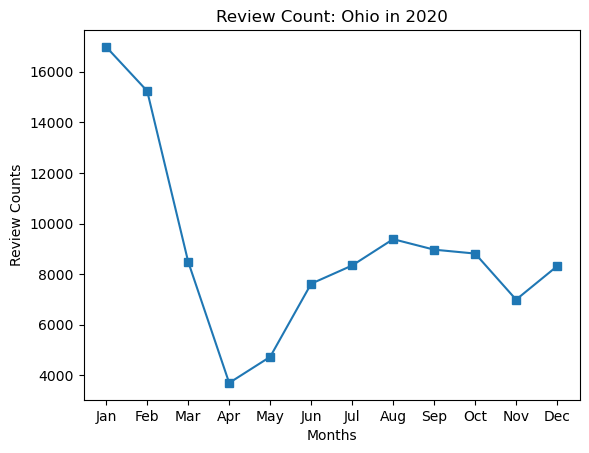

In [69]:
#Plot the line graph for review counts vs month for Ohio in 2020
ohio_post_df = pd.DataFrame(ohio_post_month).sort_index()
ohio_post_df = ohio_post_df[ohio_post_df["month_y"] != 349 ]
#ohio_post_df

tick_location = [months for months in x_axis]

x_axis = np.arange(1,13,1)
plt.plot(x_axis,ohio_post_df, marker = "s" )
plt.xticks(x_axis,months)
plt.xlabel("Months")
plt.ylabel("Review Counts")

plt.title("Review Count: Ohio in 2020")

plt.savefig("./output/review_Ohio_2020.png")
plt.show()

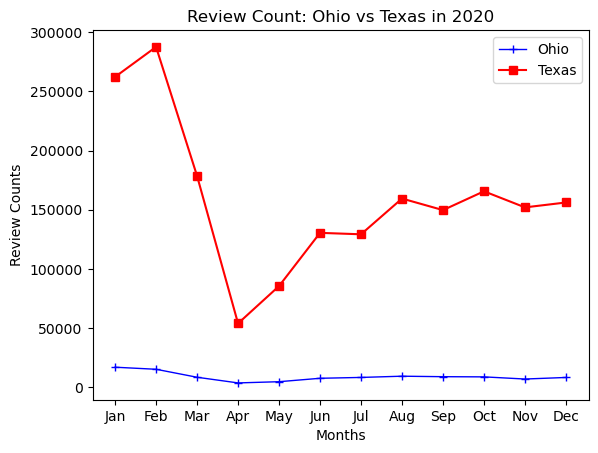

In [76]:
#Plot the line graph for review counts vs month for Ohio vs Texas in 2020
ohio_post_df_handle, = plt.plot(x_axis,ohio_post_df, marker = '+',color = 'blue',linewidth = 1, label = "Ohio")

texas_post_df_handle, = plt.plot(x_axis,texas_post_df, marker = 's',color = 'red', label = 'Texas')

tick_location = [months for months in x_axis]

plt.legend(loc = "best")
plt.xticks(x_axis,months)
plt.xlabel("Months")
plt.ylabel("Review Counts")
plt.title("Review Count: Ohio vs Texas in 2020")

plt.savefig("./output/review_ohio_vs_texas_2020.png")
plt.show()

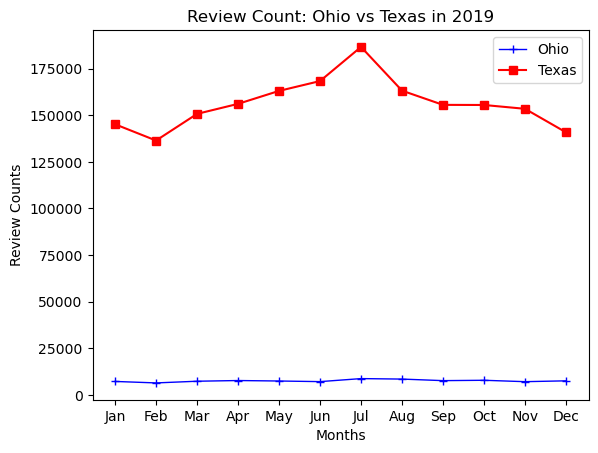

In [71]:
#Plot the line graph for review counts vs month for Ohio vs Texas in 2019
ohio_pre_df_handle, = plt.plot(x_axis,ohio_pre_df, marker = '+',color = 'blue',linewidth = 1, label = "Ohio")

texas_pre_df_handle, = plt.plot(x_axis,texas_pre_df, marker = 's',color = 'red', label = 'Texas')

plt.legend(loc = "best")

tick_location = [months for months in x_axis]
plt.xticks(x_axis,months)
plt.xlabel("Months")
plt.ylabel("Review Counts")
plt.title("Review Count: Ohio vs Texas in 2019")

plt.savefig("./output/review_ohio_vs_texas_2019.png")
plt.show()

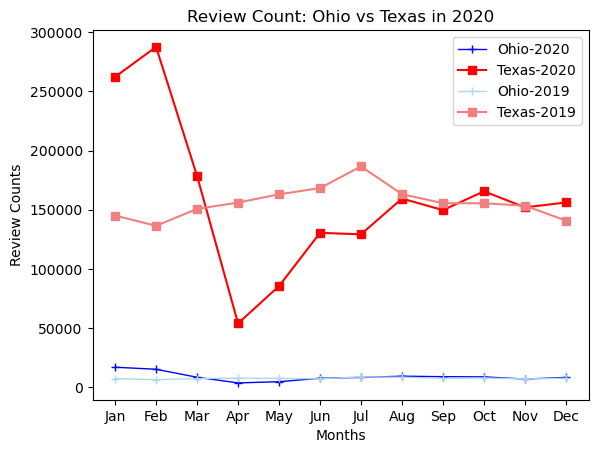

In [75]:
#Plot the line graph for review counts vs month for Ohio vs Texas in 2020 and 2019
ohio_post_df_handle, = plt.plot(x_axis,ohio_post_df, marker = '+',color = 'blue',linewidth = 1, label = "Ohio-2020")

texas_post_df_handle, = plt.plot(x_axis,texas_post_df, marker = 's',color = 'red', label = 'Texas-2020')

ohio_pre_df_handle, = plt.plot(x_axis,ohio_pre_df, marker = '+',color = 'lightblue',linewidth = 1, label = "Ohio-2019")

texas_pre_df_handle, = plt.plot(x_axis,texas_pre_df, marker = 's',color = 'lightcoral', label = 'Texas-2019')

tick_location = [months for months in x_axis]

plt.legend(loc = "best")
plt.xticks(x_axis,months)
plt.xlabel("Months")
plt.ylabel("Review Counts")
plt.title("Review Count: Ohio vs Texas in 2020")

plt.savefig("./output/review_ohio_vs_texas_2020-2019.png")
plt.show()

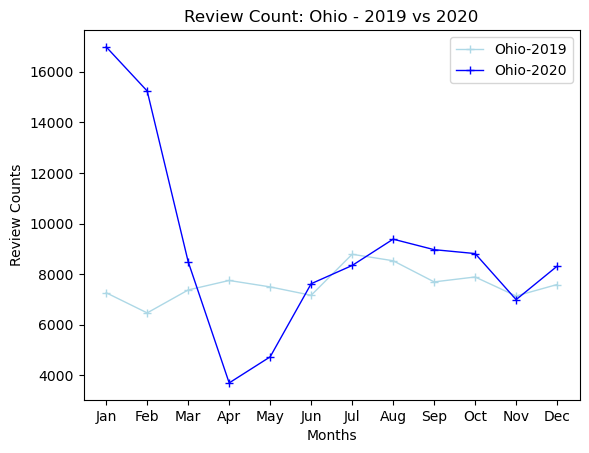

In [77]:
#Plot the line graph for review counts vs month for Ohio in 2019 vs 2020
ohio_pre_df_handle, = plt.plot(x_axis,ohio_pre_df, marker = '+',color = 'lightblue',linewidth = 1, label = "Ohio-2019")

ohio_post_df_handle, = plt.plot(x_axis,ohio_post_df, marker = '+',color = 'blue',linewidth = 1, label = "Ohio-2020")

tick_location = [months for months in x_axis]

plt.legend(loc = "best")
plt.xticks(x_axis,months)
plt.xlabel("Months")
plt.ylabel("Review Counts")
plt.title("Review Count: Ohio - 2019 vs 2020")

plt.savefig("./output/review_ohio_2020-2019.png")
plt.show()

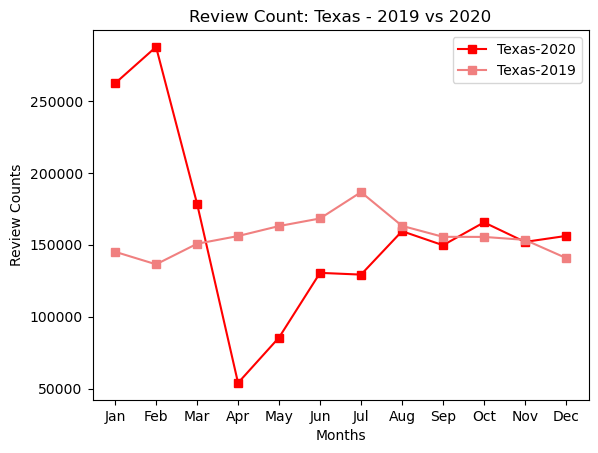

In [78]:
#Plot the line graph for review counts vs month for Texas in 2019 vs 2020
texas_post_df_handle, = plt.plot(x_axis,texas_post_df, marker = 's',color = 'red', label = 'Texas-2020')

texas_pre_df_handle, = plt.plot(x_axis,texas_pre_df, marker = 's',color = 'lightcoral', label = 'Texas-2019')

tick_location = [months for months in x_axis]

plt.legend(loc = "best")
plt.xticks(x_axis,months)
plt.xlabel("Months")
plt.ylabel("Review Counts")
plt.title("Review Count: Texas - 2019 vs 2020")

plt.savefig("./output/review_texas_2020-2019.png")
plt.show()